# Inferential statistics
Often, we are not only interested in describing our data with descriptive statistics like the mean and standard deviation, but want to know whether two or more sets of measurements are likely to come from the same underlying distribution. We want to draw inferences from the data. This is what inferential statistics is about.

To learn how to do this in python, let's use some example data:

To test whether a new wonder drug increases the eye sight, Linda and Anabel ran the following experiment with student subjects:

Experimental subjects were injected a saline solution containing 1nM of the wonder drug. Control subjects were injected saline without the drug. 
The drug is only effective for an hour or so. To assess the effect of the drug, eye sight was scored by testing the subjects' ability to read small text within one hour of drug injection.

However, Linda and Anabel used two different experimental designs:
1. Linda tested each student on ten consecutive days and measured the performance only after the experiment. She used 50 control (saline only) and 50 experimental subjects (saline+drug) - so 100 subjects in total.
2. Anabel only performed a single test per subject, but she measured the eye sight 30 minutes before and 30 minutes after the treatment. She tested 60 different subjects.

Our task is now to decide whether the wonder drug really improves eye sight as tested in these two sets of experiments.

Let's start with the first dataset:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

plt.style.use('ncb.mplstyle')

In [11]:
# load and explore the data
df1 = pd.read_csv('dat/5.03_inferential_stats_design1.csv')  # Linda's data
display(df1)

,animal,treatment,score_after
0,0,0,10.053951
1,0,0,5.894092
2,0,0,13.447026
3,0,0,6.579613
4,0,0,8.482990
...,...,...,...
995,99,1,12.000260
996,99,1,12.277938
997,99,1,13.718489
998,99,1,14.272301


## What do we need to know about the data to choose the correct statistical tests?
We want to determine whether the treatment improves of eye sight. 
What is our _Null Hypothesis_, what is our _Alternative Hypothesis_?

- Null hypothesis: mean(treatment)=mean(control). The treatment and control data were generated by the same underlying distribution with _equal means_. Any differences are due to change alone. 
- Alternative hypothesis: mean(treatment)>mean(control). The treatment and control data were generated by the two distributions with _different means_. More specifically, the treatment distribution has a larger mean than the control distribution

What does inferential statistics do?
With some probability:
- prove the Null?
- disprove the Null?
- prove the Alternative?
- disprove the Alternative?

Statistical tests assess the strength of evidence against the Null hypothesis - it allows us to disprove/reject the Null, it does not prove the Alternative!

What decision do we need to make to select the correct test?
- paired vs. unpaired data?
- one vs. two-sided test?
- normally distributed?
- equal variance?

Great! But what is the first thing you do? Plot the data!! Why? Can't we just look at summary statistics? No, they are not sufficient to fully describe the distribution and can be misleading!!

Anscombe's quartet is a famous example that illustrates that fact. It shows 4 sets of data:

![](fig/850px-Anscombe's_quartet_3.svg.png)

These four data sets are very different, but they have similar statistics:
- Mean of x: 9
- Sample variance of x: 11
- Mean of y: 7.50
- Sample variance of y:	4.125
- Correlation between x and y:	0.816
- Linear regression line: y = 3.00 + 0.500x
- Coefficient of determination of the linear regression $R^{2}$: 0.67

An even more extreme example - the data dinosaur:
<!-- ![](fig/DinoSequential-1.gif) -->

Let's start with analyzing the first dataset:

In [12]:
df1

,animal,treatment,score_after
0,0,0,10.053951
1,0,0,5.894092
2,0,0,13.447026
3,0,0,6.579613
4,0,0,8.482990
...,...,...,...
995,99,1,12.000260
996,99,1,12.277938
997,99,1,13.718489
998,99,1,14.272301


Let's plot the data:

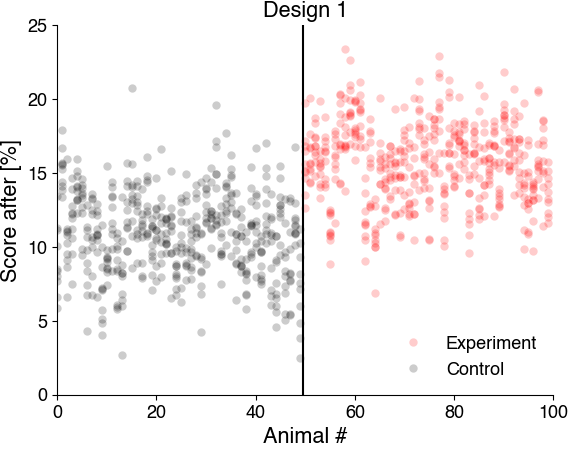

In [13]:
# Data from design 1
experiment = df1[df1['treatment']==1]
control = df1[df1['treatment']==0]

plt.plot(experiment['animal'], experiment['score_after'], 'or', alpha=0.2, label='Experiment')
plt.plot(control['animal'], control['score_after'], 'ok', alpha=0.2, label='Control')
plt.xlabel('Animal #')
plt.ylabel('Score after [%]')
plt.axvline(49.5, c='k')
plt.legend()
plt.title('Design 1')
plt.show()

### Are the samples independent? Are they paired or unpaired?
The standard statistical tests we will cover here require the samples to be either independent or paired.

In Design 1, each subject was tested repeatedly. Therefore, samples from the same animal are not independent! To remove this dependence, we can compute the mean for each animal and run the statistics. Alternatively, one can account for the dependency structure using more complex statistical models, like a linear-mixed effect model (requires statsmodels or R).

,animal,treatment,score_after
0,0,0,9.097427
1,1,0,15.234215
2,2,0,10.425896
3,3,0,11.675589
4,4,0,13.972324
...,...,...,...
95,95,1,13.760092
96,96,1,13.203628
97,97,1,16.347525
98,98,1,16.062462


N before averaging 1000 , N after averaging 100


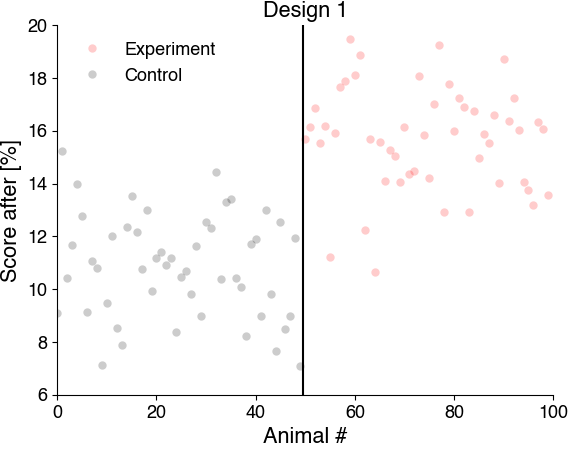

In [14]:
# Data from design 1 - average the repeated tests for each animal

dict_grouped = {'animal': [], 'treatment': [], 'score_after': []}  # initialize a dictionary with empty lists for holding the values
for animal in df1['animal'].unique():  # iterate over all animals
    this_animal = df1[df1['animal']==animal]  # get the part of the table for the current animal
    dict_grouped['animal'].append(animal)  # store the animal number
    dict_grouped['treatment'].append(this_animal['treatment'].iloc[0])  # store the treament (0/1)
    dict_grouped['score_after'].append(np.mean(this_animal['score_after']))  # compute and store the trial-averaged score for the current animal

# make DataFrame from dict
df1_avg = pd.DataFrame(dict_grouped)
display(df1_avg)
print('N before averaging', df1.shape[0],', N after averaging', df1_avg.shape[0])

# Plot the aggregated data as a control
experiment = df1_avg[df1_avg['treatment']==1]
control = df1_avg[df1_avg['treatment']==0]

plt.plot(experiment['animal'], experiment['score_after'], 'or', alpha=0.2, label='Experiment')
plt.plot(control['animal'], control['score_after'], 'ok', alpha=0.2, label='Control')
plt.xlabel('Animal #')
plt.ylabel('Score after [%]')
plt.axvline(49.5, c='k')
plt.legend()
plt.title('Design 1')
plt.show()

### One-sided or two-sided?
We reject the null hypothesis if the observed that are very unlikely to have been generated under the Null hypothesis.

A significance level of p=0.05 means there is only 5% chance of observing the data if the null hypotheses were True, which is typically taken as sufficient evidence for rejecting the null hypothesis.

To illustrate this, the grey distribution below shows the expected distribution of sample means for a sample size of 100 for a normal distribution with mean of 0 and standard deviation of 10.
Extreme values in this distribution - those far away from the true mean of 0, at the tails - are unlikely. Thus, the more extreme the sample mean, the less likely it is that the underlying samples came from this distribution.

For a _two-sided_ test, we do specify whether the empirical (sample) mean (for a t-test) is different from the population mean (_smaller __or__ greater_). The 5% of the most extreme values are therefore split between the left and right tails of the distribution.

In a _two-sided_ test, we specifically test whether the sample mean (for a t-test) is _either smaller_ (left-tailed) _or greater_ (right-tailed) than the population mean. The 5% area under the curve is therefore not split since we are only interested in the 5% of the values on the left or on the right side of the distribution.

What is our specific hypothesis? Do we need to use a two-sided or a one-sided test?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


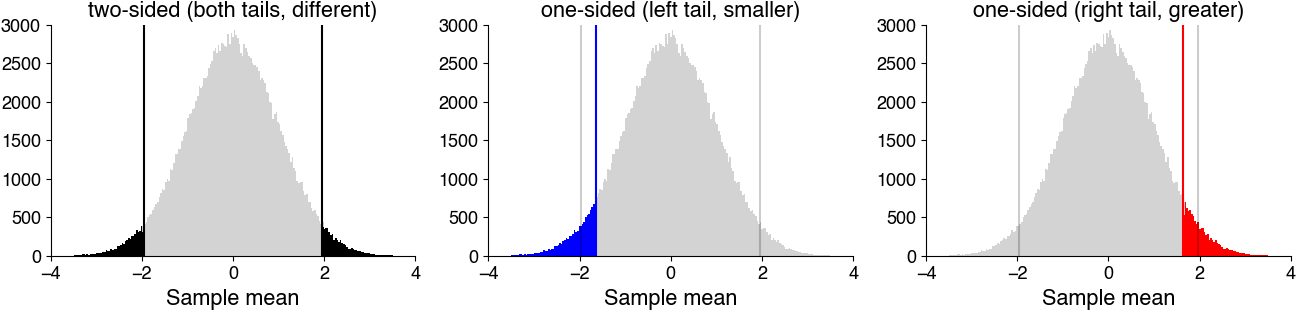

In [15]:
x = np.random.randn(200000)
bins = np.linspace(-3.5, 3.5, 200)

plt.figure(figsize=(16, 3))
plt.subplot(131)
plt.hist(x, bins=bins, color='lightgrey')
plt.hist(x[x<np.percentile(x, 2.5)], bins=bins, color='k')
plt.hist(x[x>np.percentile(x, 97.5)], bins=bins, color='k')
plt.axvline(np.percentile(x, 2.5), c='k')
plt.axvline(np.percentile(x, 97.5), c='k')
plt.title('two-sided (both tails, different)')
plt.xlabel('Sample mean')
plt.legend()

plt.subplot(132)
plt.hist(x, bins=bins, color='lightgrey')
plt.axvline(np.percentile(x, 2.5), c='k', alpha=0.2)
plt.axvline(np.percentile(x, 97.5), c='k', alpha=0.2)
plt.hist(x[x<np.percentile(x, 5)], bins=bins, color='b')
plt.axvline(np.percentile(x, 5), c='b')
plt.title('one-sided (left tail, smaller)')
plt.xlabel('Sample mean')
plt.legend()

plt.subplot(133)
plt.hist(x, bins=bins, color='lightgrey')
plt.axvline(np.percentile(x, 2.5), c='k', alpha=0.2)
plt.axvline(np.percentile(x, 97.5), c='k', alpha=0.2)
plt.hist(x[x>np.percentile(x, 95)], bins=bins, color='r')
plt.axvline(np.percentile(x, 95), c='r')
plt.title('one-sided (right tail, greater)')
plt.xlabel('Sample mean')
plt.legend()

plt.show()

### Is the data normally distributed?
The t-test assumes that the data in the sample are normally distributed in the population. This means that the values within each group or sample should follow a normal (Gaussian) distribution. This assumption is related to the parameters of the normal distribution, such as the mean and standard deviation.

To check for normality, we visualize the distributions, then run a statistical test. In `scipy.stats`, there are multiple tests for normality. We will use `scipy.stats.normaltest`, which uses the skew and kurtosis as statistics.

Text(0.5, 1.0, 'Design 1')

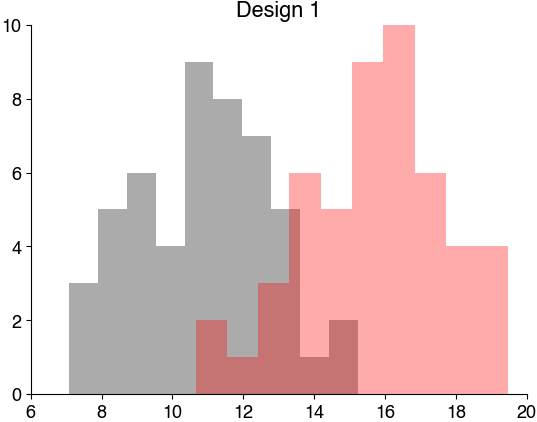

In [16]:
# Data from design 1
experiment = df1_avg[df1_avg['treatment']==1]
control = df1_avg[df1_avg['treatment']==0]

plt.hist(control['score_after'], color='k', alpha=0.33, label='Control')
plt.hist(experiment['score_after'], color='r', alpha=0.33, label='Experiment')
plt.title('Design 1')

Do we run the test on the full dataset? Or on the individual groups (treatment and control) separately?

How do we interpret the p-values? What's the null hypothesis when we test for normality?

In [17]:
print('Not correct since the experimental effect will induce non-normality:', scipy.stats.normaltest(df1_avg['score_after']))
print('Need to run per-group tests:')
for treatment in [0, 1]:
    print(scipy.stats.normaltest(df1_avg[df1_avg['treatment']==treatment]['score_after']))

Not correct since the experimental effect will induce non-normality: NormaltestResult(statistic=10.311101568856701, pvalue=0.0057673026596432924)
Need to run per-group tests:
NormaltestResult(statistic=0.977665116203375, pvalue=0.61334201754807)
NormaltestResult(statistic=1.3550283711604612, pvalue=0.5078779147507373)


If the p-value is less than the significance level, you may reject the null hypothesis and conclude that there is a statistically significant difference. This means:
- With 95% probability, the sample does not originate from a normal distribution with the mean value μ0.
- In 5% of cases, however, the significant difference may have been a result of chance, within the distribution of the null hypothesis.

### Equal variance?
The independent samples t-test (and its variants) assumes that the variances within the groups being compared are equal (homoscedasticity). In other words, it assumes that the spread or dispersion of the data is consistent across groups. This assumption is also related to population parameters. 

However, homoscedasticity is not a hard criterion, since there exitss a variant of the t-test - Welch's t-test - that accounts for unequal variance (heteroscedasticity).

Homoscedasticity is typically tested visually - by inspecting the data distributions - and rarely tested in practice. There do exist tests that compare the variance across multiple groups, like Levene test (`scipy.stats.levene`).

But, it's best to use statistical tests that do not require equal variance, like Welch's variant of the t-test).

### Exercise: Run the tests
We now know all we need to know about our samples to select the correct test:
- paired or unpaired: ?
- normal: ?
- homoscedasticity: ?
- one/two-sided: ?

Check the docs to figure out how to use the correct test:
- unpaired (independent):
    - parametric: `scipy.stats.ttest_ind` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
    - non-parametric (for non-normal data): `scipy.stats.mannwhitneyu` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html))
- paired (or related):
    - parametric: `scipy.stats.ttest_rel` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html))
    - non-parametric (for non-normal data): `scipy.stats.wilcoxon` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html))

In [18]:
treatment = df1_avg['score_after'][df1_avg['treatment']==1]
control = df1_avg['score_after'][df1_avg['treatment']==0]
print(scipy.stats.ttest_ind(treatment, control, alternative='greater', equal_var=False))

TtestResult(statistic=12.363139612077164, pvalue=5.109456570496495e-22, df=97.9954921844401)


#### If you want to compare more than two groups

First, detect group-level effects using 
- Anova: `scipy.stats.f_oneway`
- non-parameteric alternative: Kruskal-Wallis test `scipy.stats.kruskal`

If p<0.05, there exist a difference between the groups.

To then detect which groups are different, you run a post hoc test:

`scipy.stats.tukey_hsd` or `scipy.stats.dunnett`

You will do this in one of the bonus exercises.